# Project: Wrangling and Analyze Data

## Data Gathering

In [139]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt


In [140]:
#read the twitter-archive-enhanced file
Twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [141]:
#get data and write it to image_predictions file 
response  = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv','wb') as file :
    file.write(response.content)
#read the image_predictions file
image_prediction = pd.read_csv('image_predictions.tsv',sep='\t')


In [142]:
# fails list
fails_dict = []

In [143]:
#read the tweet-json.txt and add the data in fails_dict list
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    fails_dict.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count']})

In [144]:
#crate datafreame by data in fails_dict
twitter_df = pd.DataFrame(fails_dict , columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing Data

#### Twitter_archive

In [145]:
#display Twitter_archive head 
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [146]:
#display Twitter_archive tail 
Twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [147]:
#see the Twitter_archive informations 
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [148]:
#describe Twitter_archive
Twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [149]:
#see the mean of the rating_numerator and rating_denominator
Twitter_archive.rating_numerator.mean(),Twitter_archive.rating_denominator.mean()

(13.126485568760611, 10.455432937181664)

In [150]:
#see the duplicate of Twitter_archive
Twitter_archive.expanded_urls.duplicated().sum()

137

In [151]:
#see the name value counts
Twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Bailey         7
Daisy          7
Buddy          7
Toby           7
Bella          6
Stanley        6
Jax            6
Dave           6
Rusty          6
Leo            6
Koda           6
Jack           6
Milo           6
Scout          6
Oscar          6
Sunny          5
            ... 
Joey           1
Socks          1
Gunner         1
Bloop          1
Ronnie         1
Strider        1
Keet           1
Randall        1
Bertson        1
Gert           1
Berkeley       1
Stark          1
Wafer          1
Zeek           1
Olaf           1
Kawhi          1
Heinrich       1
Dot            1
Jebberson      1
Mo             1
Jordy          1
Superpup       1
Fillup         1
Zara           1
Dobby          1
Dotsy          1
DayZ           1
Buckley       

In [152]:
#see the rating_numerator value_counts
Twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [153]:
# rating_denominator value_counts
Twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### ***image predictions***

In [154]:
#display image_prediction table
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [155]:
#disply the image_prediction informations 
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [156]:
#see the image predifion duplicate 
image_prediction.duplicated().sum()

0

In [157]:
#disply the number of dogs in image_prediction
image_prediction[image_prediction[['p1_dog','p2_dog','p3_dog']]==True].count()

tweet_id       0
jpg_url        0
img_num        0
p1             0
p1_conf        0
p1_dog      1532
p2             0
p2_conf        0
p2_dog      1553
p3             0
p3_conf        0
p3_dog      1499
dtype: int64

#### ***Twitter API***

In [158]:
#disply head of twitter APl
twitter_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [159]:
#disply twitter API informaions  
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [160]:
#see the duplicate in twitter API
twitter_df.duplicated().sum()

0

### Twitter_archive

**Quality issues**
1. Some of the gathered tweets are replies and retweets
2. columns that won't be used for analysis
3. The timestamp has an incorrect datatype, should be DateTime. 
4. the "source" is display as HTML.  
5. Some values in rating_numerator and rating_denominator seem to be in error or outliers


**Tidiness issues**
1. the columns doggo, floofer, pupper or puppo should be one column.

### Image prediction table

**Quality issues**
1. unclear columns name
2. Dog breeds contain underscores
3. Missing images there is only 2075 from 2356 
4. not all images predict dog

**Tidiness issues**
1. Image predictions table should merge with Twitter_archive

### Twitter API

**Quality issues**
1. Missing tweets 
2. Erroneous datatype (tweet_id)

**Tidiness issues**
1. Twitter API table should merge with Twitter_archive

## Cleaning Data

In [161]:
# Make copies of original pieces of data
archive_clean = Twitter_archive.copy()
image_clean = image_prediction.copy()
api_clean = twitter_df.copy()

In [162]:

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Some of the gathered tweets are replies and retweets:

#### Define
> drop replies and retweets 

In [163]:
#drop replies and retweets 
archive_clean.drop(archive_clean[archive_clean['in_reply_to_status_id'].notnull()|archive_clean['retweeted_status_id'].notnull()].index,inplace = True)

#### Test

In [164]:
# Test the result
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### columns that won't be used for analysis:

#### Define:
> Drop columns not needed for our analysis

#### Code

In [165]:
# drop columns
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],1,inplace = True)

#### Test

In [166]:
#confirm changes
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### The timestamp has an incorrect datatype, should be DateTime:

#### Define
>The timestamp has an incorrect datatype, should be DateTime

#### Code

In [167]:
# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [168]:
#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.6+ KB


### the "source" is display as HTML:

#### Define
> convert the "source" format from HTML to string

#### Code

In [169]:
# Reformulate the soource column
archive_clean.source=archive_clean.source.str.extract('>([\w\W]*)<' ,expand=True)

#### Test

In [170]:
#Test
archive_clean.source.value_counts() 

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Some values in rating_numerator and rating_denominator seem to be in error or outliers:

#### Define
>regenerate the values in culmns rating_numerator and rating_denominator

#### Code

In [171]:
#reget the rating_numerator and rating_denominator from the text
p = Twitter_archive['text'].str.extract(r"(\d+\.\d*\/\d+|\d+\/\d+)")

In [172]:
#split the the result to rating_numerator and rating_denominator
#change the type of rating_numerator and rating_denominator to float 
archive_clean['rating_numerator'],archive_clean['rating_denominator']=p[0].str.split('/',1).str
archive_clean['rating_numerator']=archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator']=archive_clean['rating_denominator'].astype(float);

#### Test

In [173]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 196.6+ KB


In [174]:
#test the mean
archive_clean.rating_numerator.mean(),archive_clean.rating_denominator.mean()

(12.147725321888412, 10.448736289938006)

### the columns doggo, floofer, pupper or puppo should be one column:

#### Define
> add(doggo, floofer, pupper or puppo)in one column.

#### Code

In [175]:
#get all index of dog stage from evry column
dog_stage=np.array(['None' for _ in range(archive_clean.doggo.count())], dtype=object)
dog_stage[archive_clean[archive_clean['doggo']=='doggo'].index.values]='doggo'
dog_stage[archive_clean[archive_clean['puppo']=='puppo'].index.values]='puppo'
dog_stage[archive_clean[archive_clean['pupper']=='pupper'].index.values]='pupper'
dog_stage[archive_clean[archive_clean['floofer']=='floofer'].index.values]='floofer'

In [176]:
#add all dog stage in one column
archive_clean['dog_stage'] = pd.DataFrame(dog_stage.tolist())

In [177]:
# drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [178]:
# display cleaned dataset
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1042,743895849529389061,2016-06-17 19:59:26,Twitter for iPhone,When you're given AUX cord privileges from the...,10.0,10.0,None,None
429,821107785811234820,2017-01-16 21:32:06,Twitter for iPhone,Here's a doggo who looks like he's about to gi...,11.0,10.0,None,doggo
698,786363235746385920,2016-10-13 00:29:39,Twitter for iPhone,This is Rizzo. He has many talents. A true ren...,13.0,10.0,Rizzo,doggo
567,802239329049477120,2016-11-25 19:55:35,Twitter for iPhone,This is Loki. He'll do your taxes for you. Can...,12.0,10.0,Loki,puppo
1320,706346369204748288,2016-03-06 05:11:12,Twitter for iPhone,This is Koda. She's a Beneboom Cumberwiggle. 1...,12.0,10.0,Koda,None


### unclear columns name:

#### Define
> change columns name.

In [179]:
# rename the columns
image_clean.rename(columns = {'jpg_url':'image_url','img_num':'number_of_image','p1':'1_prediction','p1_conf':'1_prediction_confident','p1_dog':'1_prediction_isdog'
                             ,'p2':'2_prediction','p2_conf':'2_prediction_confident','p2_dog':'2_prediction_isdog'
                             ,'p3':'3_prediction','p3_conf':'3_prediction_confident','p3_dog':'3_prediction_isdog'},inplace = True);

### test

In [180]:
# test the result
image_clean.columns

Index(['tweet_id', 'image_url', 'number_of_image', '1_prediction',
       '1_prediction_confident', '1_prediction_isdog', '2_prediction',
       '2_prediction_confident', '2_prediction_isdog', '3_prediction',
       '3_prediction_confident', '3_prediction_isdog'],
      dtype='object')

### Dog breeds contain underscores:

#### Define
> remove underscores from dog breeds contain .

In [181]:
#remove underscores from dog breeds contain
image_clean['1_prediction'] = image_clean['1_prediction'].str.replace('_', ' ').str.title()
image_clean['2_prediction'] = image_clean['2_prediction'].str.replace('_', ' ').str.title()
image_clean['3_prediction'] = image_clean['3_prediction'].str.replace('_', ' ').str.title()

### test

In [182]:
#test
image_clean[['1_prediction', '2_prediction', '3_prediction']]

,1_prediction,2_prediction,3_prediction
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### not all images predict dog:

#### Define
> remove undog images 

> add highest prediction_confidence in one column

> add highest prediction_confidence breed in one column

In [183]:
# create new columns with non data
image_clean['breed']=np.nan
image_clean['prediction_confidence']=np.nan

In [184]:
#get the highest prediction and add it to the new columns
for Row in range(image_clean.tweet_id.count()):
    if(image_clean.loc[Row,"1_prediction_isdog"]):
        image_clean.loc[Row,'breed'] = image_clean.loc[Row,'1_prediction']
        image_clean.loc[Row,'prediction_confidence'] = image_clean.loc[Row,'1_prediction_confident']
    elif(image_clean.loc[Row,"2_prediction_isdog"]):
        image_clean.loc[Row,'breed'] = image_clean.loc[Row,'2_prediction']
        image_clean.loc[Row,'prediction_confidence'] = image_clean.loc[Row,'2_prediction_confident']    
    elif(image_clean.loc[Row,"3_prediction_isdog"]):
        image_clean.loc[Row,'breed'] = image_clean.loc[Row,'3_prediction']
        image_clean.loc[Row,'prediction_confidence'] = image_clean.loc[Row,'3_prediction_confident']

In [185]:
image_clean

,tweet_id,image_url,number_of_image,1_prediction,1_prediction_confident,1_prediction_isdog,2_prediction,2_prediction_confident,2_prediction_isdog,3_prediction,3_prediction_confident,3_prediction_isdog,breed,prediction_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,Bernese Mountain Dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,NaN,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle,0.201493


In [186]:
#drop the columns
image_clean.drop(['1_prediction','1_prediction_confident','1_prediction_isdog'
                             ,'2_prediction','2_prediction_confident','2_prediction_isdog'
                             ,'3_prediction','3_prediction_confident','3_prediction_isdog'],
                      axis=1, inplace=True)

In [187]:
#drop the nan row in new columns
image_clean.dropna(subset = ['breed', 'prediction_confidence'], inplace = True)


### test

In [188]:
#test
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id                 1751 non-null int64
image_url                1751 non-null object
number_of_image          1751 non-null int64
breed                    1751 non-null object
prediction_confidence    1751 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


### Erroneous datatype (tweet_id):

#### Define
> change datatype (tweet_id)

In [189]:
api_clean.tweet_id=api_clean.tweet_id.astype(int);

### test

In [190]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### merge datasets


In [191]:
#make the tweet_id as index
archive_clean.set_index("tweet_id", inplace = True)
image_clean.set_index("tweet_id", inplace = True)
api_clean.set_index("tweet_id", inplace = True)

In [192]:
#merge all datasets 
master_archive = pd.merge(left=archive_clean,right=image_clean,on='tweet_id')
master_archive = pd.merge(left=master_archive,right=api_clean,on='tweet_id')

In [193]:
# display new dataset
master_archive

,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,image_url,number_of_image,breed,prediction_confidence,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908
891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048
891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,3261,20562
890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,2158,12041
890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,16716,56848
890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,4429,28226
890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467


In [194]:
# confirm new dataset 
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 892177421306343426 to 666020888022790149
Data columns (total 13 columns):
timestamp                1666 non-null datetime64[ns]
source                   1666 non-null object
text                     1666 non-null object
rating_numerator         1666 non-null float64
rating_denominator       1666 non-null float64
name                     1666 non-null object
dog_stage                1475 non-null object
image_url                1666 non-null object
number_of_image          1666 non-null int64
breed                    1666 non-null object
prediction_confidence    1666 non-null float64
retweet_count            1666 non-null int64
favorite_count           1666 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 182.2+ KB


## Storing Data

In [195]:
#Store the Clean dataset in a CSV file
master_archive.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [196]:
#read the file
master_archive = pd.read_csv("twitter_archive_master.csv")

In [197]:
# check the read
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 14 columns):
tweet_id                 1666 non-null int64
timestamp                1666 non-null object
source                   1666 non-null object
text                     1666 non-null object
rating_numerator         1666 non-null float64
rating_denominator       1666 non-null float64
name                     1666 non-null object
dog_stage                1475 non-null object
image_url                1666 non-null object
number_of_image          1666 non-null int64
breed                    1666 non-null object
prediction_confidence    1666 non-null float64
retweet_count            1666 non-null int64
favorite_count           1666 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 182.3+ KB


In [198]:
# Change types
master_archive.timestamp = pd.to_datetime(master_archive.timestamp) 

In [199]:
master_archive.describe()

,tweet_id,rating_numerator,rating_denominator,number_of_image,prediction_confidence,retweet_count,favorite_count
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,7.395044e+17,11.336002,10.468788,1.214286,0.551571,2834.429772,9288.184274
std,6.801710e+16,7.304689,6.343940,0.573959,0.298923,4831.960790,12641.538890
min,6.660209e+17,0.000000,2.000000,1.000000,0.000010,16.000000,81.000000
25%,6.775503e+17,10.000000,10.000000,1.000000,0.305955,650.500000,2176.000000
50%,7.141778e+17,11.000000,10.000000,1.000000,0.550914,1440.500000,4464.000000
75%,7.931921e+17,12.000000,10.000000,1.000000,0.822939,3261.000000,11734.750000
max,8.921774e+17,165.000000,150.000000,4.000000,0.999956,79515.000000,132810.000000


Quick look some stats thatwe can see the mean of ratiog is 11/10 also we see the maximum number of retweet is 79515 retweet with 132810 of favorite that means there alot of  people like and love dog but whene we see the prediction_confidence we have 0.55 which we might expect a lot of misclassified dogs.

### Insights1: Most 10 dogs breeds have  retweet

In [200]:
groupByDog =master_archive.groupby(['breed'], group_keys=False).sum()
groupByDog.sort_values("retweet_count", ascending=False).retweet_count[:10]

breed
Golden Retriever      586657.0
Labrador Retriever    405404.0
Pembroke              291771.0
Chihuahua             250722.0
Samoyed               203446.0
French Bulldog        156230.0
Cocker Spaniel        145743.0
Chow                  131025.0
Pug                   118682.0
Toy Poodle            115330.0
Name: retweet_count, dtype: float64

In [201]:
#creat barchart plot
def plot_bar(data, title="", xlabel="", ylabel="", rotation=0):
    
    g_bar = data.plot.bar()

    g_bar.figure.set_size_inches(8,5);

    plt.title(title, color = 'black', fontsize = '17')
    plt.xlabel(xlabel, color = 'black', fontsize = '13')
    plt.ylabel(ylabel, color = 'black', fontsize = '13');

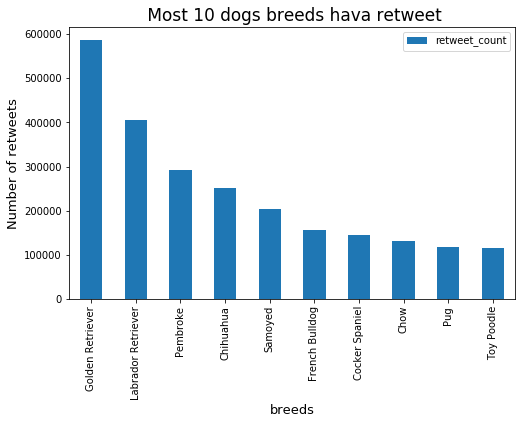

In [202]:
#sort and crat dataframe for retweet_count
dog_breeds = pd.DataFrame(groupByDog.sort_values("retweet_count", ascending=False).retweet_count[:10])



#Add dta and labels
plot_bar(dog_breeds,' Most 10 dogs breeds hava retweet','breeds','Number of retweets')

Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most dog breeds have retweet

### Insights2:  The most predicted dogs Breeds from neural network

In [203]:
#sort and crat dataframe for prediction_confidence
mean_Dog = master_archive.groupby(['breed'], group_keys=False).mean()
mean_Dog_prediction =pd.DataFrame(mean_Dog.sort_values("prediction_confidence", ascending=False).prediction_confidence[:10])
mean_Dog_prediction

,prediction_confidence
breed,
Komondor,0.972531
Clumber,0.946718
Keeshond,0.844431
Bull Mastiff,0.815618
Brittany Spaniel,0.775591
Bernese Mountain Dog,0.766685
Samoyed,0.717440
Blenheim Spaniel,0.699588
Pomeranian,0.699526


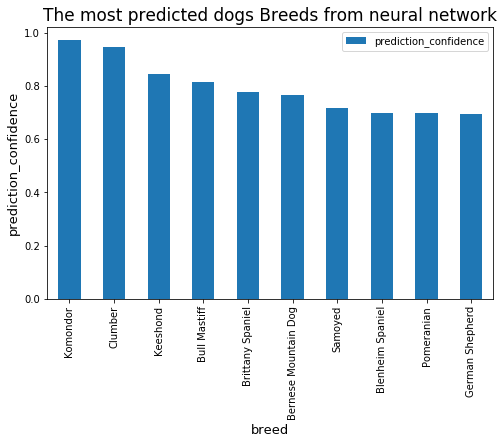

In [204]:
#Add dta and labels
plot_bar(mean_Dog_prediction,'The most predicted dogs Breeds from neural network','breed','prediction_confidence')

### Insights3:  Popularity over Time

dependence on Favorites and Retweets over time

In [205]:
# grouping by years 
master_archive.groupby(master_archive.timestamp.dt.year )[['retweet_count','favorite_count']].mean()

,retweet_count,favorite_count
timestamp,,
2015,1108.379921,2603.938976
2016,2677.092857,7691.658333
2017,6007.374214,24183.399371


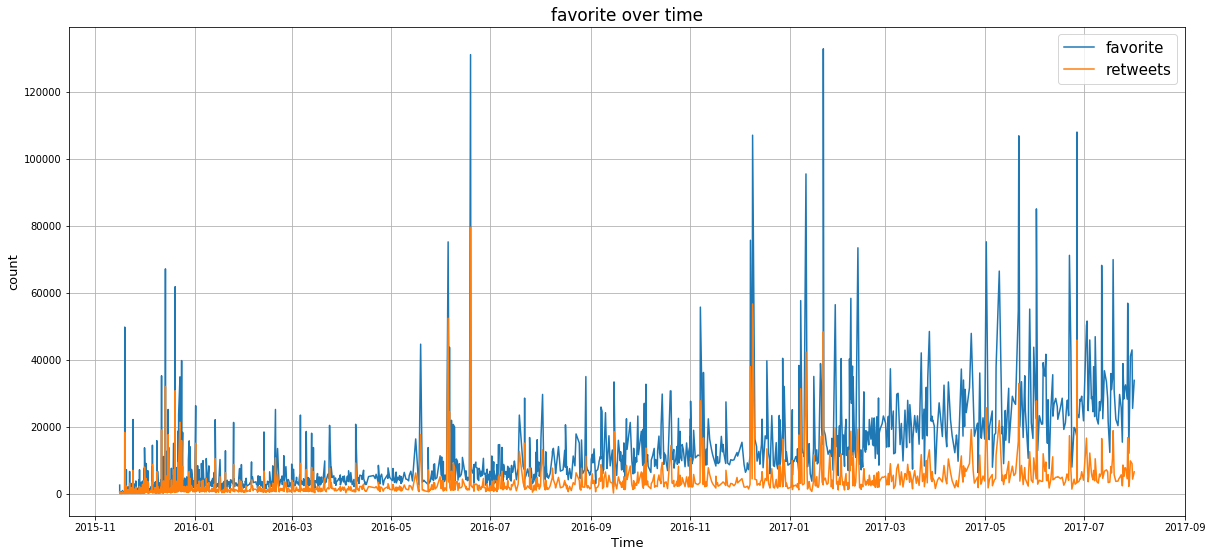

In [206]:
#crate line chart for favorite_count and retweet_count
plt.subplots(figsize=(20, 9))
plt.plot(master_archive.timestamp, master_archive.favorite_count,label = "favorite")
plt.plot(master_archive.timestamp,master_archive.retweet_count,label = "retweets")
plt.title('favorite over time', color = 'black', fontsize = '17')
plt.xlabel('Time',color = 'black', fontsize = '13')
plt.ylabel('count',color = 'black', fontsize = '13')
plt.grid()
plt.legend(fontsize=15);
plt.show()


We can realize that there is an increase in popularity at some times, but when looking at Favorites, we can say that there is an increase in popularity in general, and when looking at Retweets The situation is a little different, we can say that it is increase but less then Favorites over a long period of time